<a href="https://colab.research.google.com/github/fortune-max/M5-probability-and-statistics/blob/main/probability_and_statitsics_2024_real_world_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Probability & Statistics** - Graded Assignment 8

In [69]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [4]:
# https://www.kaggle.com/datasets/gregorut/videogamesales/
data = pd.read_csv('./content/vgsales.csv')

## **Task 1 *(5 points)*** - Exploratory data analysis

In this section, you will get to know the data you are working with.

First, describe the dataset in a couple of sentences. Mention what it's about, which information is available in it, etc.

TODO your text here

Now, highlight at least three interesting things one can learn from the dataset. Make some plots, summary tables, etc., and always include an explanation of what you see in plain English. Make it a short data story that is interesting to read!

You can use our *Titanic* and *Mammals* notebooks as an inspiration.

In [5]:
data.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [6]:
print("Num of rows, cols", data.shape)

Num of rows, cols (16598, 11)


In [7]:
platforms = data.Platform.unique()
print("platforms =>", platforms, end="\n\n")

genres = data.Genre.unique()
print("genres =>", genres, end="\n\n")

publishers = data.Publisher.unique()
print("publishers", len(publishers), end="\n\n")

platforms => ['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' '3DS' 'PS4' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'GC' 'WiiU' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']

genres => ['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy']

publishers 579



In [8]:
ps1_games_count = len(data[data["Platform"] == "PS"])
ps2_games_count = len(data[data["Platform"] == "PS2"])
ps3_games_count = len(data[data["Platform"] == "PS3"])
ps4_games_count = len(data[data["Platform"] == "PS4"])

print("ps1", ps1_games_count)
print("ps2", ps2_games_count)
print("ps3", ps3_games_count)
print("ps4", ps4_games_count)

ps1 1196
ps2 2161
ps3 1329
ps4 336


<Axes: title={'center': 'Number of games published across years'}, xlabel='Year', ylabel='Number of Games'>

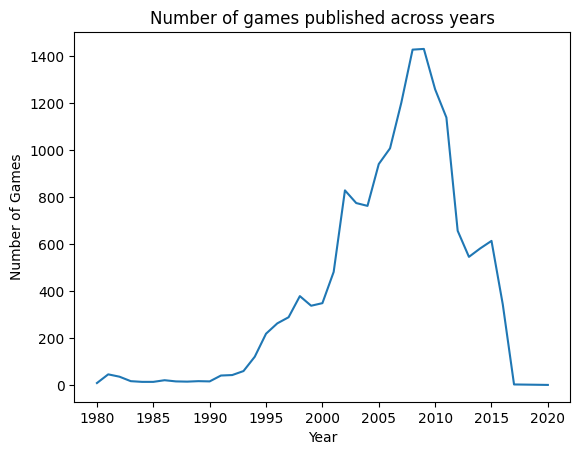

In [9]:
# games published by year
plt.title('Number of games published across years')
plt.xlabel('Year')
plt.ylabel('Number of Games')
data['Year'].value_counts().sort_index().plot()

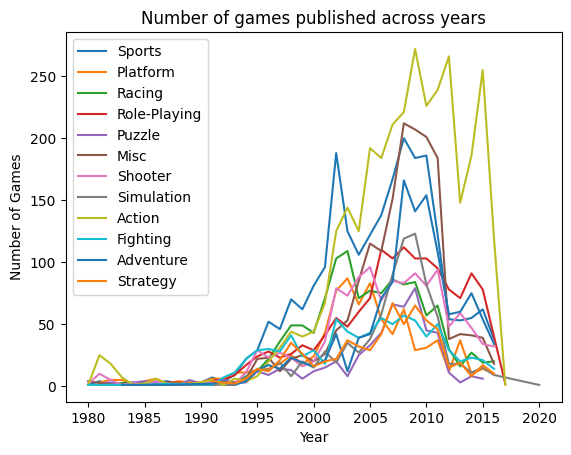

In [43]:
# plots of the genres across the years
genres = data.Genre.unique()
plt.title('Number of games published across years')
plt.xlabel('Year')
plt.ylabel('Number of Games')
for genre in genres:
    data[data.Genre == genre].Year.value_counts().sort_index().plot(label=genre)
plt.legend()

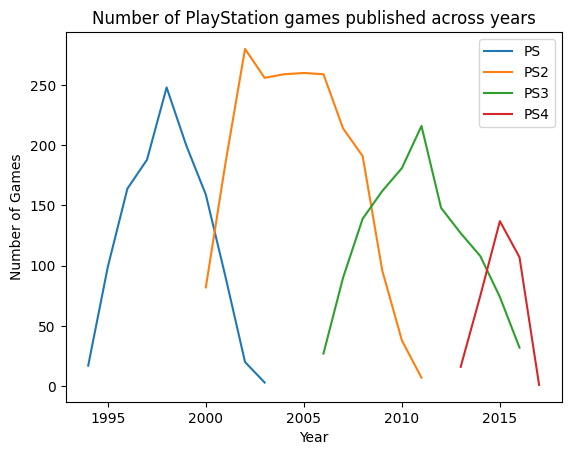

In [45]:
plt.title('Number of PlayStation games published across years')
plt.xlabel('Year')
plt.ylabel('Number of Games')
data[data['Platform'] == 'PS']['Year'].value_counts().sort_index().plot()
data[data['Platform'] == 'PS2']['Year'].value_counts().sort_index().plot()
data[data['Platform'] == 'PS3']['Year'].value_counts().sort_index().plot()
data[data['Platform'] == 'PS4']['Year'].value_counts().sort_index().plot()
plt.legend(['PS', 'PS2', 'PS3', 'PS4'])

In [40]:
# correlation between sales in different regions

eu_sales = data['EU_Sales']
na_sales = data['NA_Sales']
jp_sales = data['JP_Sales']
print("eu, na", np.corrcoef(eu_sales, na_sales), end="\n\n")
print("eu, jp", np.corrcoef(eu_sales, jp_sales), end="\n\n")
print("na, jp", np.corrcoef(na_sales, jp_sales))

eu, na [[1.         0.76772675]
 [0.76772675 1.        ]]

eu, jp [[1.         0.43558445]
 [0.43558445 1.        ]]

na, jp [[1.         0.44978741]
 [0.44978741 1.        ]]


## **Task 2 *(5 points)*** - Hypothesis testing

Formulate 1-2 hypotheses and test it Based on the available data.

For every hypothesis, clearly state:
1. the hypothesis that is being tested in plain English  
2. $H_0$ and $H_1$
3. which statistical test you've chosen
4. why is the test applicable (what are the assumptions of the test? are they satisfied?)
5. how do you interpret the outcome of the test





Hypothesis - I believe that the games published in a year, is related to the games sold that year.

H0 - Total game sales per year are dependent on the total games published per year
H1 - Total game sales per year are independent of the total games published per year

In [66]:
global_sales = data.groupby('Year').sum()['Global_Sales']
games_published = data['Year'].value_counts().sort_index()

/var/folders/zg/95x_7ysx1vx7x6tt_gpw6dp00000gn/T/ipykernel_98050/315190024.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  global_sales = data.groupby('Year').sum()['Global_Sales']


In [71]:
stat, p = stats.normaltest(global_sales)
print("stats, p", stat, p)
print("is global sales normally distributed?", p > 0.05)

stat, p = stats.normaltest(games_published)
print("stats, p", stat, p)
print("is games published normally distributed?", p > 0.05)

stats, p 5.012697277212056 0.08156552136415468
is global sales normally distributed? True
stats, p 5.445396868275094 0.0656972353597288
is games published normally distributed? True


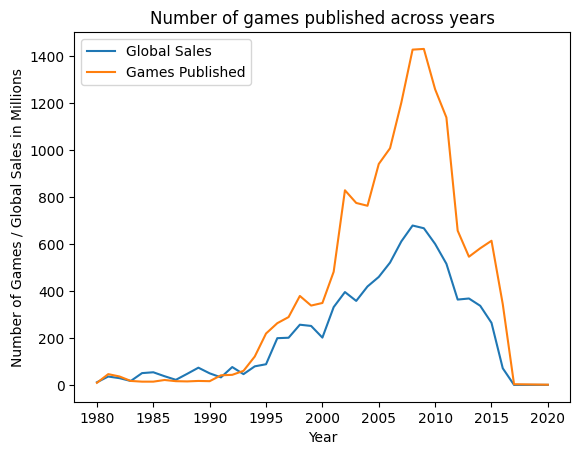

In [74]:
plt.title('Number of games published across years')
plt.xlabel('Year')
plt.ylabel('Number of Games / Global Sales in Millions')
global_sales.plot()
games_published.plot()
plt.legend(['Global Sales', 'Games Published'])

I will choose the Pearson's Rank correlation test to check the measure of correlation of the two datasets.

The data follows a normal distribution.
Observations are independent and identically distributed.
Variances are similar.

In [75]:
corr, p_value = stats.pearsonr(global_sales, games_published)
print('Spearmans rank correlation: %.3f' % corr)
print('p-value: %.3f' % p_value)

alpha = 0.05
if p_value > alpha: # independent
    print('We reject the null hypothesis that the two datasets are dependent.')
else: # dependent
    print('We cannot reject the null hypothesis that the two datasets are dependent.')

Spearmans rank correlation: 0.983
p-value: 0.000
We cannot reject the null hypothesis that the two datasets are dependent.
